### Part 1

In [1]:
import pandas as pd
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
warnings.filterwarnings("ignore")

def myPCA(X, k='inf'):
    mean_vals = np.mean(X, axis=0)
    mid = X - mean_vals
    cov_mat = np.cov(mid, rowvar=False)
    eig_vals, eig_vects = linalg.eig(np.mat(cov_mat))
    eig_val_index = np.argsort(eig_vals)
    eig_val_index = eig_val_index[:-(k + 1):-1]
    eig_vects = eig_vects[:, eig_val_index]
    low_dim_mat = np.array(np.dot(mid, eig_vects),dtype=float)
    reconstruct = np.array(np.dot(low_dim_mat, eig_vects.T) + mid, dtype=float)
    return low_dim_mat, eig_vals, reconstruct

### Part 2

In [2]:
# Import Data from MNIST dataset
df = pd.read_csv('https://rb.gy/uc8esl',header=None)
Y = df.loc[:, 0]
X = df.drop([0], axis=1)
pca_mnist = myPCA(X,k=784) # ran with MNIST data


### Part 3

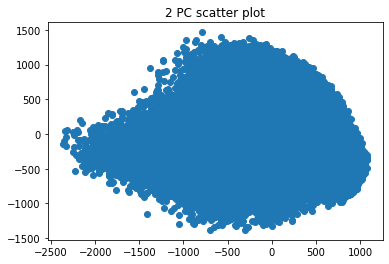

In [18]:
pca_mnist =  myPCA(X,k=2)
plt.title("2 PC scatter plot")
plt.plot(pca_mnist[0][:, 0], pca_mnist[0][:, 1], 'o');

### Part 4

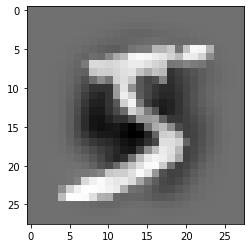

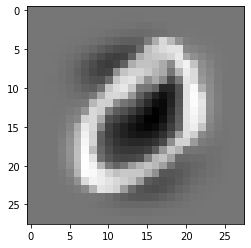

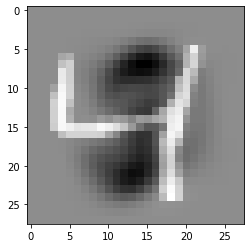

In [4]:
pca_mnist =  myPCA(X,k=10) 
for i in range(3):
  a = pca_mnist[2][i].reshape(28,28)
  plt.imshow(a, cmap='gray')
  plt.show()

### Part 5

In [31]:
l = 18000
k = 30
iters = 10
x_test = X.iloc[:l, :]
x_train = X.iloc[l+1: , :]
y_train = Y.iloc[l+1:]
y_test = Y.iloc[:l]
pca_mnist =  myPCA(X,k=k)
pca_x_test = pca_mnist[0][:l]
pca_x_train = pca_mnist[0][l+1:]
pca_y_train = Y.iloc[l+1:]
pca_y_test = Y.iloc[:l ]
lrc1 = LogisticRegression( max_iter = iters, multi_class = "multinomial")
time_start_unreduced = time.time()
lrc1.fit(x_train, y_train)
time_stop_unreduced = time.time()
time_diff_unreduced = time_stop_unreduced - time_start_unreduced
print('Time taken for training unreduced data:', time_diff_unreduced, 'seconds')
pred = lrc1.predict(x_test)
acc_unreduced = (accuracy_score(y_test, pred)) * 100 
print('Accuracy on original dataset:', acc_unreduced,"%")
lrc2 = LogisticRegression( max_iter = iters, multi_class = "multinomial")
pca_time_start = time.time()
lrc2.fit(pca_x_train, pca_y_train)
pca_end_time = time.time()
pca_diff = pca_end_time - pca_time_start
print('Time taken for training reduced data:', pca_diff, 'seconds')
predicted_y_test_PCA_split = lrc2.predict(pca_x_test)
acc_PCA = (accuracy_score(pca_y_test, predicted_y_test_PCA_split)) * 100
print('Accuracy on reduced dataset:', acc_PCA,"%" )
net_time_diff = (time_diff_unreduced - pca_diff)
print("Training time reduced by:", time_diff_net," seconds")
print("Difference in accuracy is:", acc_unreduced - acc_PCA,"%")

Time taken for training unreduced data: 3.626218795776367 seconds
Accuracy on original dataset: 88.78888888888888 %
Time taken for training reduced data: 0.7668263912200928 seconds
Accuracy on reduced dataset: 87.65555555555555 %
Training time reduced by: 2.645138740539551  seconds
Difference in accuracy is: 1.1333333333333258 %


### Part 6

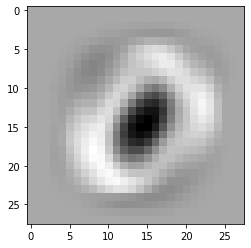

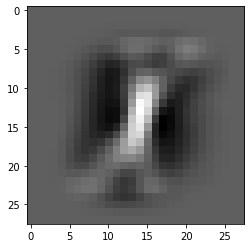

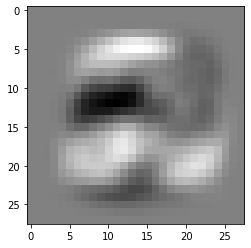

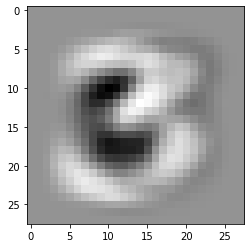

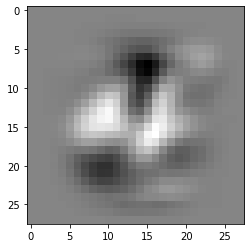

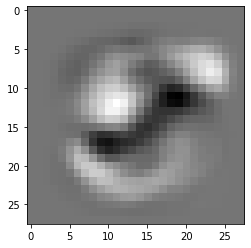

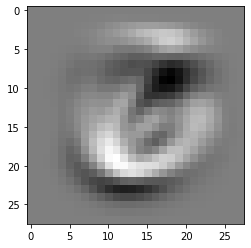

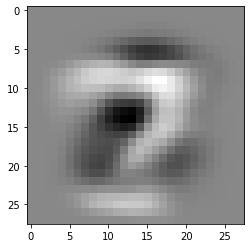

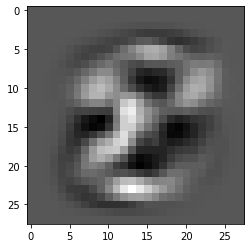

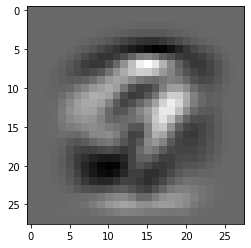

In [30]:
for i in range(10):
  plt.imshow(lrc1.coef_[i].reshape(28,28), cmap='gray')
  plt.show()